In [36]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [3]:
onlyfiles = [f for f in listdir("spreadsheets/") if isfile(join("spreadsheets/", f))]
onlyfiles

['Drinking Water Watch Dataset.xlsx',
 'Public Potable Water Systems FINAL 06-22-2018_0.csv',
 'uw_self-cert_submittals.xlsx']

In [4]:
allfiles = {}
for a in onlyfiles:
    if ".xlsx" in a:
        allfiles[a.split(' ', 1)[0]] = pd.ExcelFile("spreadsheets/" + a)
    if ".csv" in a:
        print(a)
        allfiles[a.split(' ', 1)[0]] = pd.read_csv("spreadsheets/" + a, encoding='ISO-8859-1')

Public Potable Water Systems FINAL 06-22-2018_0.csv


In [5]:
alldata = {}
for key, b in allfiles.items():
    if type(b) is pd.ExcelFile:
        alldata[key] = {}
        for a in b.sheet_names:
            alldata[key][a] = b.parse(a)
    if type(b) is pd.DataFrame:
        alldata[key] = {}
        alldata[key][key] = b
print(alldata.keys())

dict_keys(['Drinking', 'Public', 'uw_self-cert_submittals.xlsx'])


In [22]:
a = alldata['Drinking']["Table3_AllWellLocations"]
b = alldata["Public"]['Public']

In [23]:
c = a.merge(b, left_on='WATER_SYSTEM_NO', right_on='Water System No ')

In [35]:
c.keys()

Index(['REG_AGENCY', 'WATER_SYSTEM_NO', 'PWS_NAME', 'SYSTEM_ACTIVITY_STATUS',
       'FACILITY_NAME', 'WSF_Activity', 'WSF_ID', 'WSF_Type',
       'LATITUDE_MEASURE', 'LONGITUDE_MEASURE', 'Water System No ',
       'Water System Name', 'Principal County Served',
       'Federal Water System Type -CODE', 'Federal Water System Type ',
       'State Water System Type -CODE', 'State Water System Type',
       'Water System Status -CODE', 'Water System Status', 'Owner Type -CODE',
       'Owner Type', 'Primary Water Source Type -CODE',
       'Primary Water Source Type', 'Residential Population',
       'Non Transient Population', 'Transient Population', 'Total Population',
       'Number of Service Connections Agricultural',
       'Number of COMBINED Service Connections (CB)',
       'Number of Commercial (CM) Service Connections',
       'Numer of Institutional Service Conections',
       'Number of Residential Service Connections',
       'Total Number of Service Connections', 'Fee Code

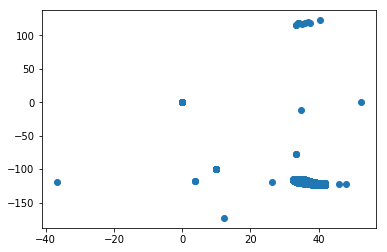

In [38]:
plt.scatter(c["LATITUDE_MEASURE"], c["LONGITUDE_MEASURE"])
plt.show()